# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## 서울시 구별 인구 현황

### 서울시 통계DB
- http://stat.seoul.go.kr/jsp3/index.jsp
- 서울에서 인구수가 많으면 고령비율도 높을까?

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

from IPython.display import Image

reference = lambda file, w=None, h=None : \
    Image(filename=file, width=w, height=h) 
    
stat_01 = './images/DC_stat_seoul_population.png'
stat_02 = './images/seoul_map.gif'

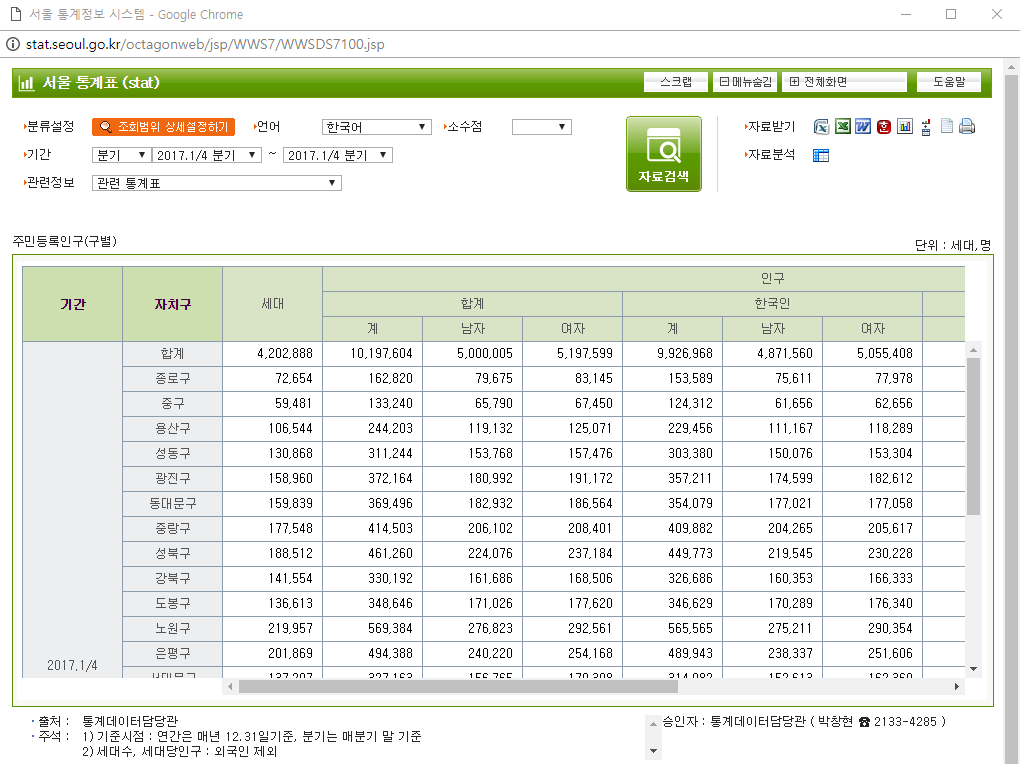

In [3]:
Image(stat_01)

In [4]:
population = pd.read_excel('data/Report_seoul_population_2018_3Q.xls', 
                     header=2,
                     # parse_cols="B, C, D, M, N"                           
                     usecols="B, C, D, M, N"
                    )
population.head()

자치구       세대         계  세대당인구  65세이상고령자
0   합계  4254018  10068381   2.30   1405404
1  종로구    73696    163086   2.08     26622
2   중구    61232    135258   2.05     21902
3  용산구   108777    245087   2.11     37443
4  성동구   136831    317197   2.26     42581

In [5]:
population.tail()

자치구      세대       계  세대당인구  65세이상고령자
21  관악구  261401  521685   1.93     71840
22  서초구  173912  441539   2.52     54887
23  강남구  228883  549255   2.38     66412
24  송파구  269558  673582   2.47     80220
25  강동구  177591  434992   2.43     58280

#### <font color='blue'> # unique 체크후, 합계오 nan 부분을 drop </font>

In [6]:
population['자치구'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [7]:
population = population.drop([0])
population

자치구      세대       계  세대당인구  65세이상고령자
1    종로구   73696  163086   2.08     26622
2     중구   61232  135258   2.05     21902
3    용산구  108777  245087   2.11     37443
4    성동구  136831  317197   2.26     42581
5    광진구  161714  369999   2.20     45202
6   동대문구  162232  366101   2.16     57096
7    중랑구  180044  409058   2.25     61271
8    성북구  186744  449574   2.35     67447
9    강북구  143172  324276   2.24     57741
10   도봉구  137901  342990   2.47     55499
11   노원구  217900  551069   2.51     76466
12   은평구  203951  487849   2.37     76643
13  서대문구  138027  322497   2.25     50278
14   마포구  171320  385032   2.18     50559
15   양천구  176598  469945   2.64     57442
16   강서구  257558  605068   2.32     78814
17   구로구  172121  439234   2.36     61293
18   금천구  106774  252359   2.18     35299
19  영등포구  170208  403724   2.17     55364
20   동작구  175873  407925   2.25     58803
21   관악구  261401  521685   1.93     71840
22   서초구  173912  441539   2.52     54887
23   강남구  228883  549255   2.38     66412
24   송파구  269558  673582   2.47     80220
25   강동구  177591  434992   2.43     58280

In [8]:
population['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [9]:
population.rename(columns = {'계':'인구수'}, inplace=True)
population.rename(columns = {'자치구':'구'}, inplace=True)
population.head()

구      세대     인구수  세대당인구  65세이상고령자
1  종로구   73696  163086   2.08     26622
2   중구   61232  135258   2.05     21902
3  용산구  108777  245087   2.11     37443
4  성동구  136831  317197   2.26     42581
5  광진구  161714  369999   2.20     45202

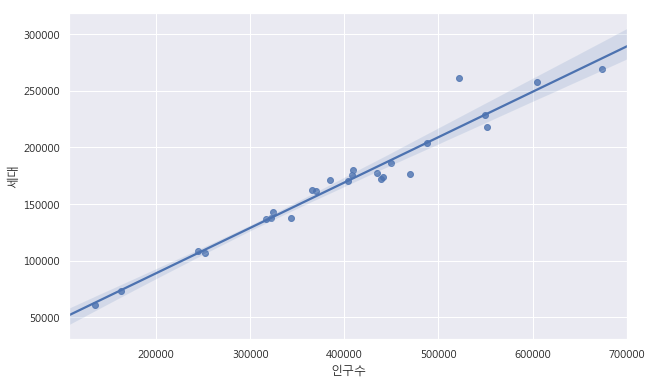

In [11]:
sns.regplot(x="인구수", y="세대", data=population);

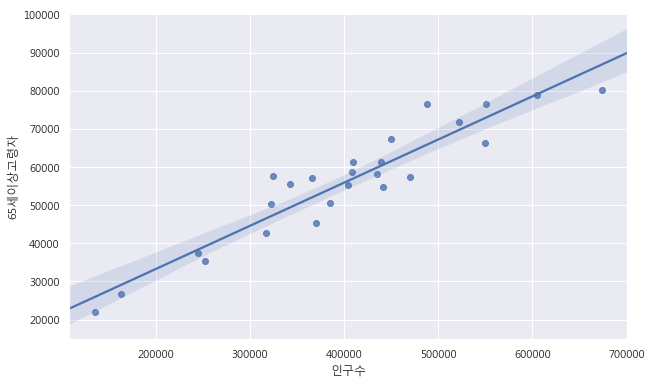

In [12]:
sns.regplot(x="인구수", y="65세이상고령자", data=population);

### <font color='blue'> 참조.  https://github.com/southkorea/southkorea-maps/tree/master/kostat/2013/json </font>

In [13]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [14]:
geo_path = 'data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='utf-8'))
# geo_str

In [15]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['인구수']})
guDat.head()

gu  counts
1  종로구  163086
2   중구  135258
3  용산구  245087
4  성동구  317197
5  광진구  369999

In [16]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map

In [17]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='YlGnBu', #PuRd, YlGnBu
              key_on='feature.id')

In [18]:
map

In [19]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [20]:
map

In [21]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['65세이상고령자']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [22]:
map

In [23]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['세대당인구']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')


In [24]:
map

In [25]:
population['고령비율'] = population['65세이상고령자'] / population['인구수'] * 100
population.head()

구      세대     인구수  세대당인구  65세이상고령자       고령비율
1  종로구   73696  163086   2.08     26622  16.323903
2   중구   61232  135258   2.05     21902  16.192758
3  용산구  108777  245087   2.11     37443  15.277432
4  성동구  136831  317197   2.26     42581  13.424150
5  광진구  161714  369999   2.20     45202  12.216790

In [26]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['고령비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [27]:
map

In [28]:
population.sort_values(by='65세이상고령자', ascending=False).head(5)

구      세대     인구수  세대당인구  65세이상고령자       고령비율
24  송파구  269558  673582   2.47     80220  11.909463
16  강서구  257558  605068   2.32     78814  13.025643
12  은평구  203951  487849   2.37     76643  15.710394
11  노원구  217900  551069   2.51     76466  13.875939
21  관악구  261401  521685   1.93     71840  13.770762

In [29]:
population.sort_values(by='인구수', ascending=False).head(5)

구      세대     인구수  세대당인구  65세이상고령자       고령비율
24  송파구  269558  673582   2.47     80220  11.909463
16  강서구  257558  605068   2.32     78814  13.025643
11  노원구  217900  551069   2.51     76466  13.875939
23  강남구  228883  549255   2.38     66412  12.091287
21  관악구  261401  521685   1.93     71840  13.770762

In [30]:
population.sort_values(by='세대당인구', ascending=False).head(5)

구      세대     인구수  세대당인구  65세이상고령자       고령비율
15  양천구  176598  469945   2.64     57442  12.223132
22  서초구  173912  441539   2.52     54887  12.430838
11  노원구  217900  551069   2.51     76466  13.875939
24  송파구  269558  673582   2.47     80220  11.909463
10  도봉구  137901  342990   2.47     55499  16.180938

In [31]:
population.sort_values(by='고령비율', ascending=False).head(5)

구      세대     인구수  세대당인구  65세이상고령자       고령비율
9   강북구  143172  324276   2.24     57741  17.806128
1   종로구   73696  163086   2.08     26622  16.323903
2    중구   61232  135258   2.05     21902  16.192758
10  도봉구  137901  342990   2.47     55499  16.180938
12  은평구  203951  487849   2.37     76643  15.710394

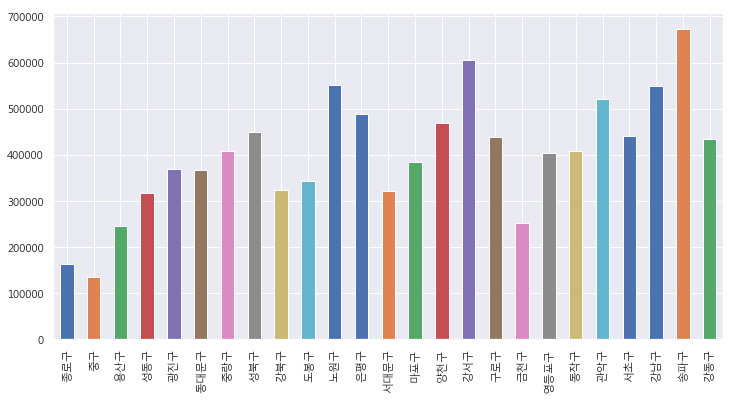

In [32]:
plt.rcParams["figure.figsize"] = [12,6]
df_population = pd.Series(population['인구수'].values, index=population['구'].values)
df_population.plot(kind='bar');

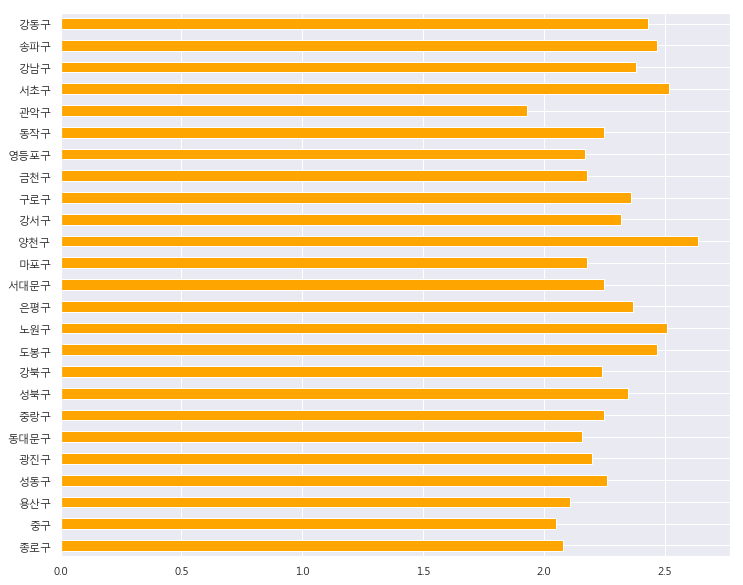

In [33]:
plt.rcParams["figure.figsize"] = [12,10]
df_population = pd.Series(population['세대당인구'].values, index=population['구'].values)
df_population.plot(kind='barh', color='orange');

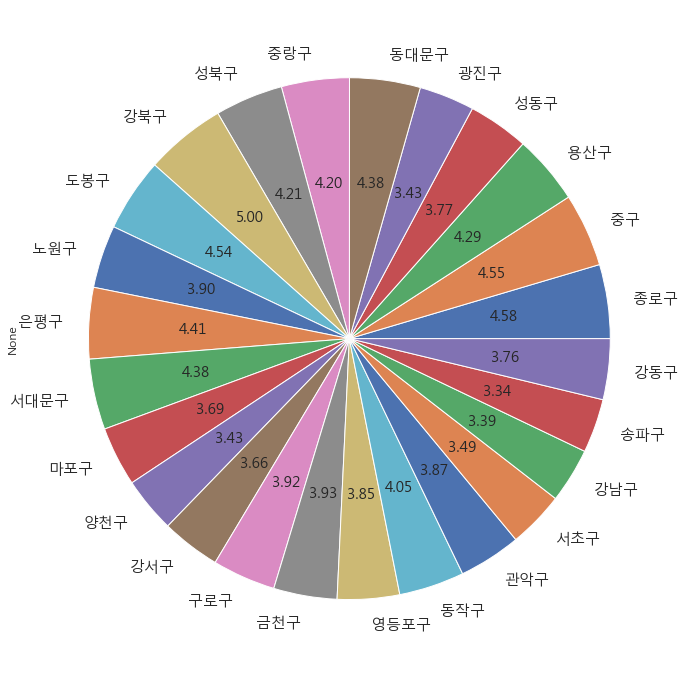

In [34]:
plt.rcParams["figure.figsize"] = [12,12]
df_population = pd.Series(population['고령비율'].values, index=population['구'].values)
df_population.plot(kind='pie', autopct='%.2f', fontsize=15);

In [35]:
population.to_csv('data/seoul_population.csv', sep=',', index=False, encoding='euc-kr')

In [36]:
# % ls data

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>